## UCI car evaluation - Final CodeAcademy project


In [341]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [342]:
cars = pd.read_csv("car.data", header=None)
cars[1000:1100]

,0,1,2,3,4,5,6
1000,med,high,3,2,small,med,unacc
1001,med,high,3,2,small,high,unacc
1002,med,high,3,2,med,low,unacc
1003,med,high,3,2,med,med,unacc
1004,med,high,3,2,med,high,unacc
...,...,...,...,...,...,...,...
1095,med,med,2,4,big,low,unacc
1096,med,med,2,4,big,med,acc
1097,med,med,2,4,big,high,vgood
1098,med,med,2,more,small,low,unacc


In [343]:
columns = ["buying","maint","doors","persons","lug_boot","safety","class"]

In [344]:
cars.columns = columns
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Preliminary Data analysis

In [345]:
cars.shape

(1728, 7)

In [346]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [347]:
cars.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,3,2,big,high,unacc
freq,432,432,432,576,576,576,1210


In [348]:
cars.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [349]:
cars.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [350]:
cars["maint"].value_counts()

high     432
vhigh    432
med      432
low      432
Name: maint, dtype: int64

In [351]:
# checking distribution of target variable class 
cars["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [352]:
round(cars["class"].value_counts()/len(cars)*100,2)

unacc    70.02
acc      22.22
good      3.99
vgood     3.76
Name: class, dtype: float64

Conclusion: Looks like there is a high percentage, that the price of a car is unaccurate.

### Data Preprocessing

Encode categorical features to integers

In [353]:
encoder = OrdinalEncoder()

In [354]:
data = encoder.fit_transform(cars.drop('class',axis=1))
df = pd.DataFrame(data,columns=columns[:-1])
df

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0
1724,1.0,1.0,3.0,2.0,1.0,0.0
1725,1.0,1.0,3.0,2.0,0.0,1.0
1726,1.0,1.0,3.0,2.0,0.0,2.0


### Modelling

In [355]:
X_train, X_test, y_train, y_test = train_test_split(df, cars["class"], test_size=0.2, random_state=101)

In [356]:
len(y_test)

346

In [357]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df, cars["class"], test_size=0.15, random_state=1000)

### Decision Tree 

In [374]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [375]:
tree1 = DecisionTreeClassifier(max_depth=10)

In [376]:
tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [377]:
y_pred = tree1.predict(X_test)

In [378]:
accuracy_score(y_test,y_pred)

0.9624277456647399

In [379]:
print(confusion_matrix(y_test, y_pred))

[[ 65   2   3   0]
 [  4   9   0   0]
 [  3   1 248   0]
 [  0   0   0  11]]


In [380]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.90      0.93      0.92        70
        good       0.75      0.69      0.72        13
       unacc       0.99      0.98      0.99       252
       vgood       1.00      1.00      1.00        11

    accuracy                           0.96       346
   macro avg       0.91      0.90      0.91       346
weighted avg       0.96      0.96      0.96       346



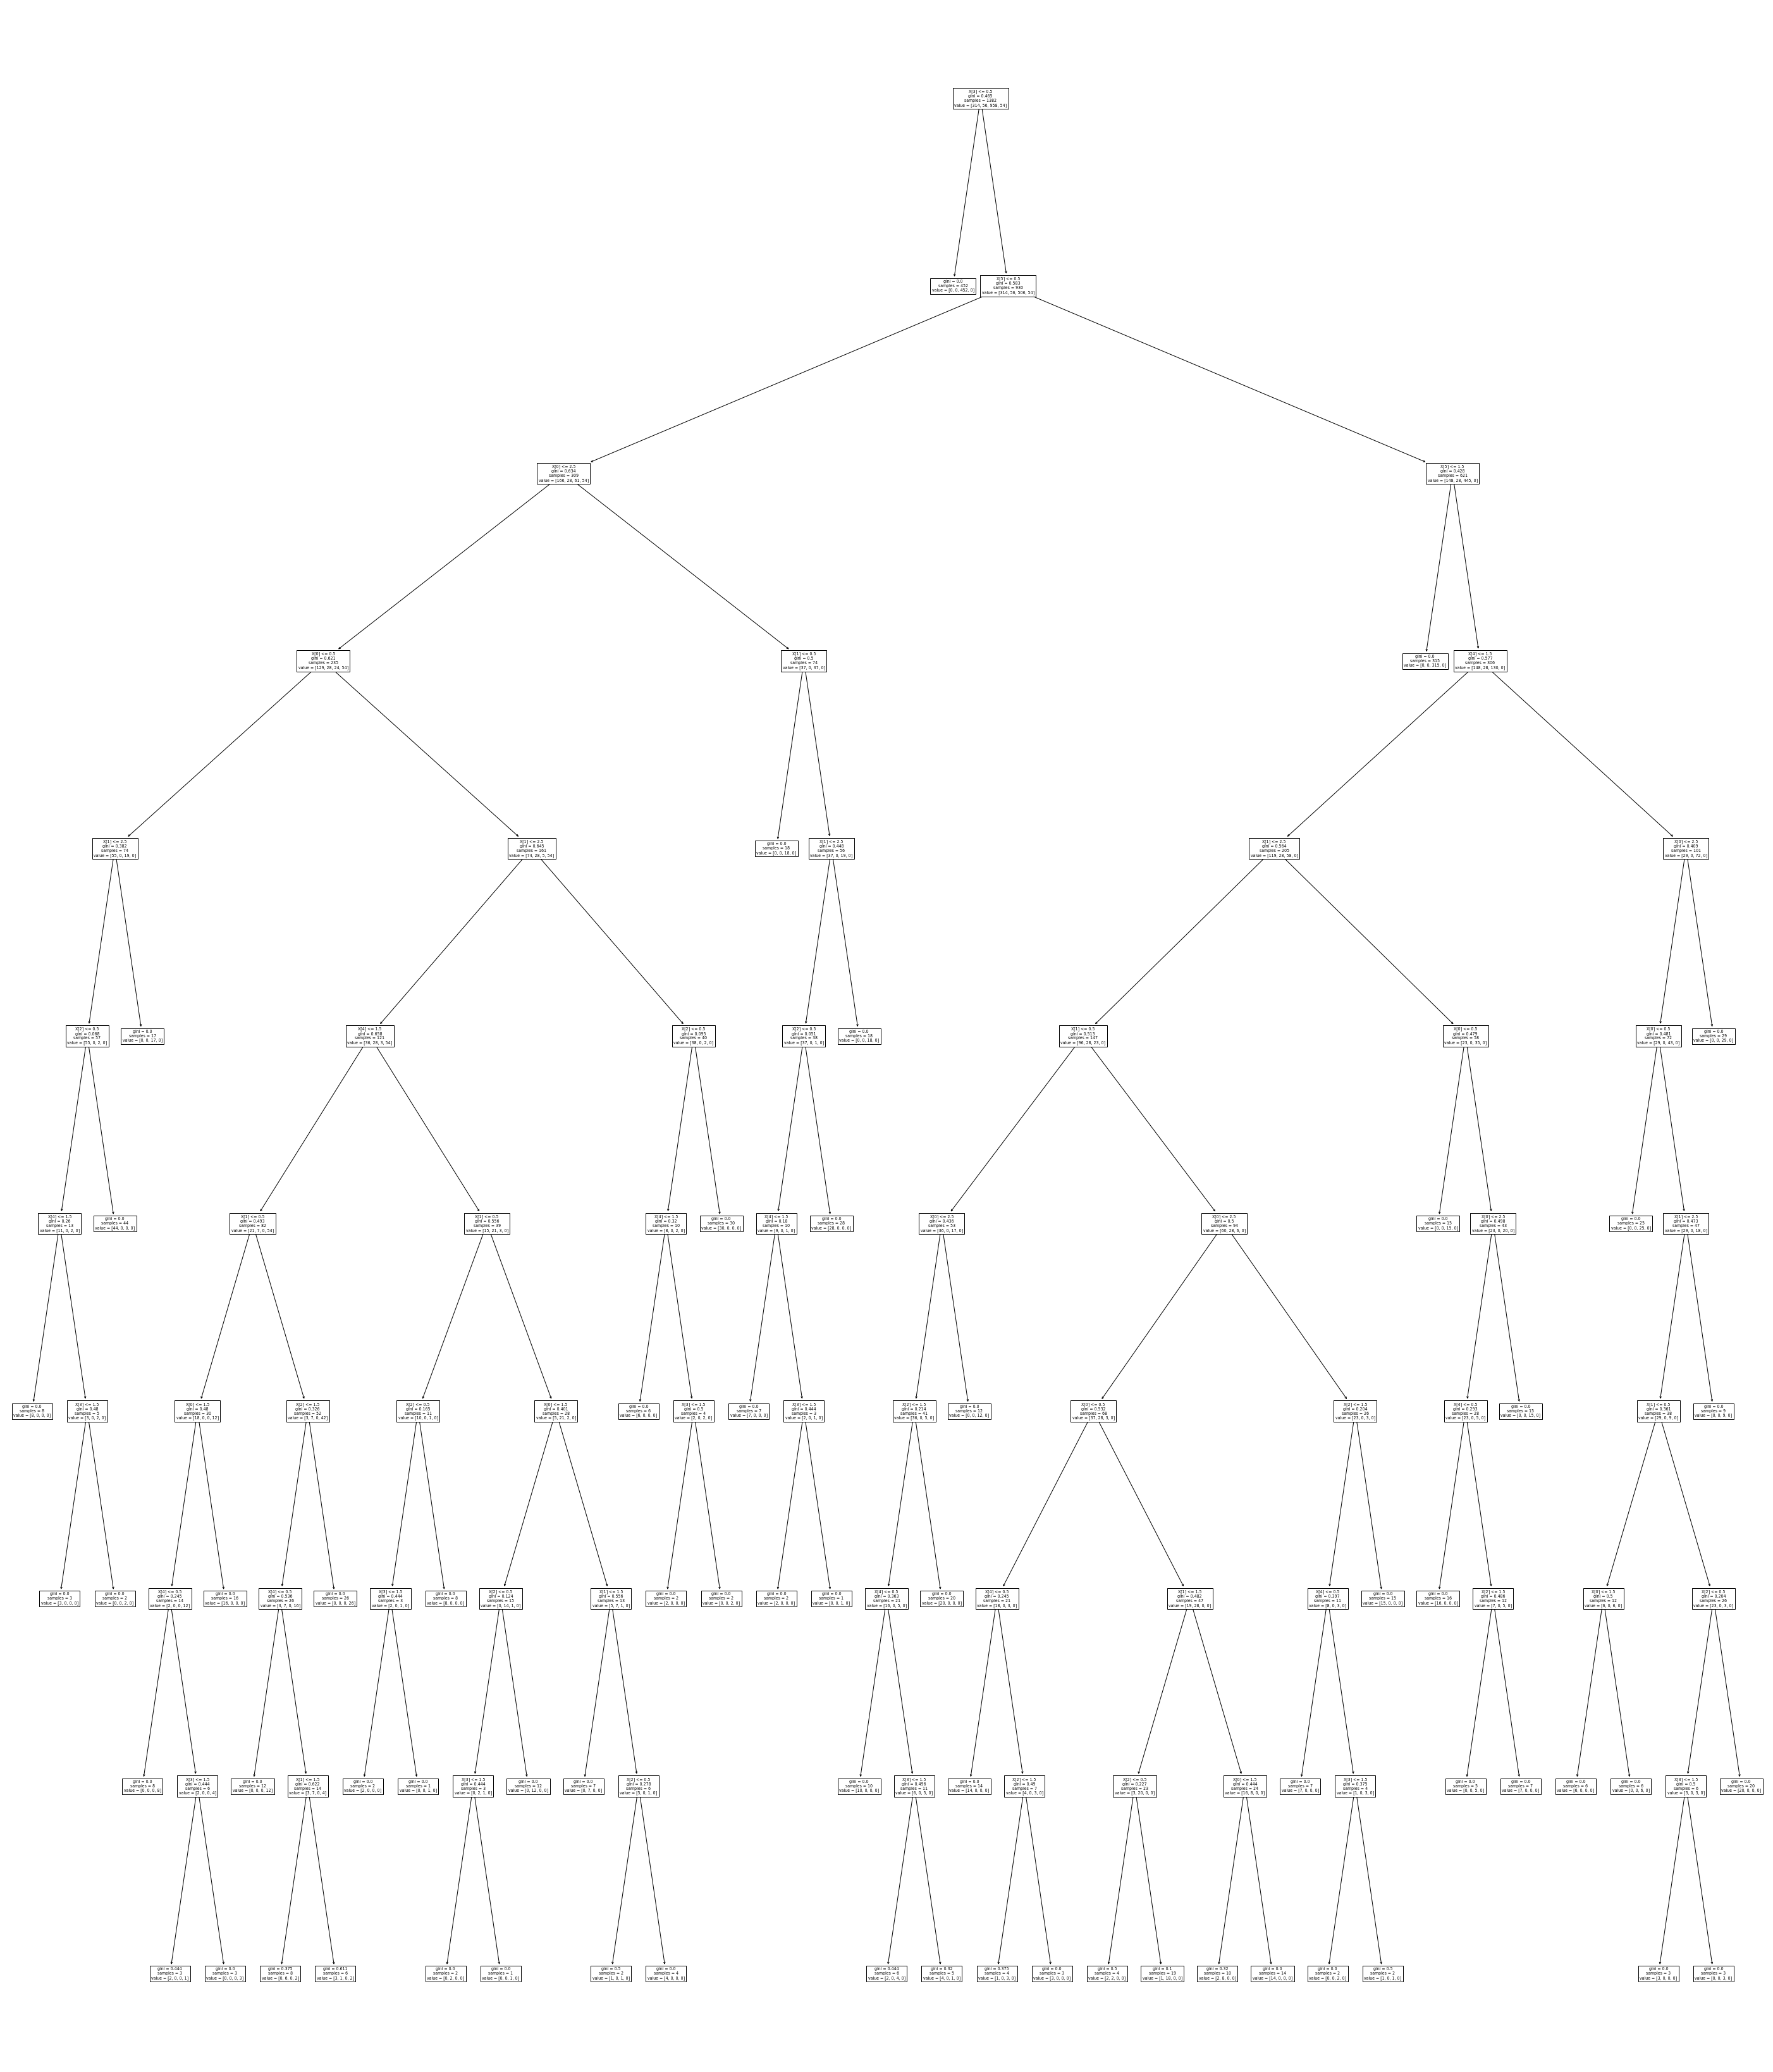

In [382]:
plt.figure(figsize=(50,60))
tree.plot_tree(tree1.fit(X_train, y_train)) 
plt.show()

### Random Forest

In [366]:
from sklearn.ensemble import RandomForestClassifier

In [367]:
rclf = RandomForestClassifier()

In [368]:
rclf.fit(X_train, y_train)

RandomForestClassifier()

In [369]:
y_pred_rclf = rclf.predict(X_test)

In [370]:
accuracy_score(y_test,y_pred_rclf)

0.9682080924855492

In [371]:
print(confusion_matrix(y_test, y_pred_rclf))

[[ 66   1   2   1]
 [  1  11   0   1]
 [  5   0 247   0]
 [  0   0   0  11]]


#### Classification report Decision Tree

In [372]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.69      0.77      0.73        70
        good       0.00      0.00      0.00        13
       unacc       0.96      0.94      0.95       252
       vgood       0.48      1.00      0.65        11

    accuracy                           0.87       346
   macro avg       0.53      0.68      0.58       346
weighted avg       0.86      0.87      0.86       346



C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Classification report Random Forest

In [373]:
print(classification_report(y_test, y_pred_rclf))

              precision    recall  f1-score   support

         acc       0.92      0.94      0.93        70
        good       0.92      0.85      0.88        13
       unacc       0.99      0.98      0.99       252
       vgood       0.85      1.00      0.92        11

    accuracy                           0.97       346
   macro avg       0.92      0.94      0.93       346
weighted avg       0.97      0.97      0.97       346



### Conclusion:

1) In this project, I build a Decision-Tree Classifier & Random forest model to predict accuracy of the price of a car. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.9682 & 0.9739. 
 